<a href="https://colab.research.google.com/github/SuganyaMurugesan/TrafficLightDetection/blob/master/dataInspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/HCLHackathon')

In [0]:
!pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2975 sha256=f38dcfe015d773d63ff4ea98b66f660ed32902b92f566ea8007a25c06b148c7b
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [0]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
from mrcnn.config import Config

# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import import_ipynb
import SmallObject as SmallObject

%matplotlib inline

In [0]:

config = SmallObject.TrafficLightConfig()
TRAFFICLIGHT_DIR = "/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train"

In [0]:
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
from sklearn.model_selection import train_test_split
train_list, val_list = SmallObject.train_validation_split(
        TRAFFICLIGHT_DIR, seed=11, test_size=0.1)
dataset = SmallObject.TrafficLightDataset()
dataset.load_trafficlight(train_list, TRAFFICLIGHT_DIR)

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Index(['61332.pgm', '687268.pgm', '60430.pgm', '697962.png', '539910.png',
       '720516.png', '514516.png', '60152.png', '59666.png', '61542.png',
       ...
       '630544.pgm', '614636.png', '687268.png', '627572.pgm', '485098.pgm',
       '630128.pgm', '622254.png', '620348.png', '713460.png', '713670.pgm'],
      dtype='object', name='filename', length=387)
Image Count: 387
Class Count: 2
  0. BG                                                
  1. trafficlight                                      


DISPLAY SAMPLE IMAGE


{'id': '720862.png', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/720862.png', 'width': 1280, 'height': 720, 'rect': [{'y_min': 226.9400307839, 'x_max': 919.4230770071, 'occluded': False, 'x_min': 899.183249997, 'y_max': 272.4655171591, 'label': 'Green'}, {'y_min': 139.8358006199, 'x_max': 598.3584658523, 'occluded': False, 'x_min': 577.2528356431, 'y_max': 186.3130926764, 'label': 'Green'}, {'y_min': 141.2930329349, 'x_max': 423.7506165752, 'occluded': False, 'x_min': 402.3058729247, 'y_max': 186.7784811305, 'label': 'Green'}]}
<class 'numpy.ndarray'>
START: (226.9400307839, 899.183249997)
END: (272.4655171591, 919.4230770071)
START: (139.8358006199, 577.2528356431)
END: (186.3130926764, 598.3584658523)
START: (141.2930329349, 402.3058729247)
END: (186.7784811305, 423.7506165752)


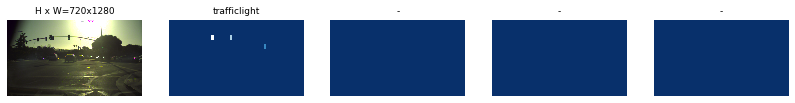

{'id': '683058.png', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/683058.png', 'width': 1280, 'height': 720, 'rect': []}
<class 'numpy.ndarray'>


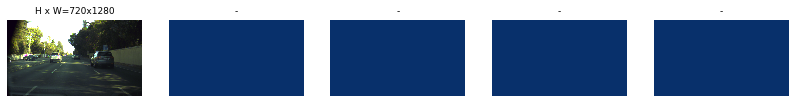

{'id': '719752.pgm', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/719752.pgm', 'width': 1280, 'height': 736, 'rect': []}
<class 'numpy.ndarray'>


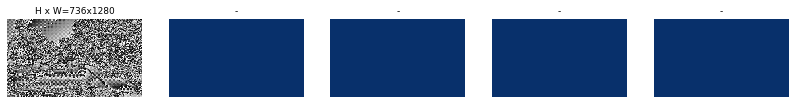

{'id': '689908.png', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/689908.png', 'width': 1280, 'height': 720, 'rect': [{'y_min': 240.5365598481, 'x_max': 614.5327686767, 'occluded': False, 'x_min': 605.1857701408, 'y_max': 259.453104504, 'label': 'Green'}, {'y_min': 290.5619773931, 'x_max': 623.9077608865, 'occluded': False, 'x_min': 620.28111458, 'y_max': 299.2659285288, 'label': 'Green'}, {'y_min': 273.2000668152, 'x_max': 718.0295658375, 'occluded': False, 'x_min': 711.1305907277, 'y_max': 284.5499936087, 'label': 'Green'}, {'y_min': 260.0697593481, 'x_max': 754.3048220601, 'occluded': False, 'x_min': 742.5098000981, 'y_max': 284.5499936087, 'label': 'Green'}]}
<class 'numpy.ndarray'>
START: (240.5365598481, 605.1857701408)
END: (259.453104504, 614.5327686767)
START: (290.5619773931, 620.28111458)
END: (299.2659285288, 623.9077608865)
START: (273.2000668152, 711.1305907277)
END: (284.5499936087, 718.0295658375)
START: (260.0697593

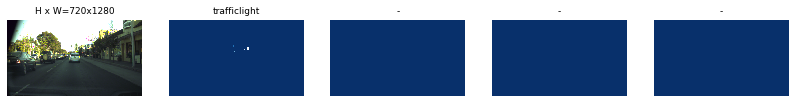

In [0]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)


BOUNDING BOXES

{'id': '57196.png', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/57196.png', 'width': 1280, 'height': 720, 'rect': [{'y_min': 259.3689794926, 'x_max': 789.5532240143, 'occluded': False, 'x_min': 784.2109844425, 'y_max': 272.9118037884, 'label': 'off'}, {'y_min': 304.6370751733, 'x_max': 888.8925908244, 'occluded': False, 'x_min': 880.261596538, 'y_max': 315.7486025268, 'label': 'Yellow'}]}
<class 'numpy.ndarray'>
START: (259.3689794926, 784.2109844425)
END: (272.9118037884, 789.5532240143)
START: (304.6370751733, 880.261596538)
END: (315.7486025268, 888.8925908244)
IN IMAGE REFERENCE ***************$$$$$$$$
image_id  283 /content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/57196.png
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
mask                     shape: (720, 1280, 2)        min:    0.00000  max:    1.00000  bool
class_ids                shape: (2,)                  mi

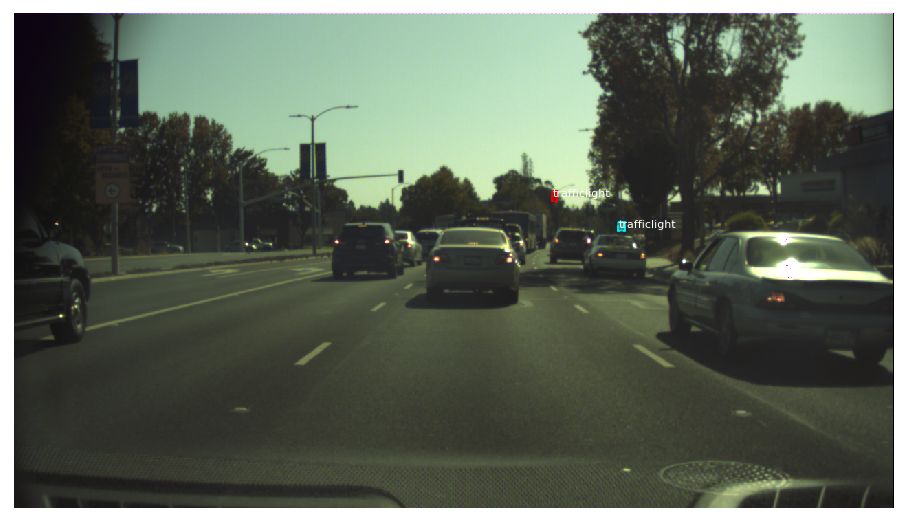

In [0]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

RESIZE IMAGE

{'id': '707348.pgm', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/707348.pgm', 'width': 1280, 'height': 736, 'rect': [{'label': 'Green', 'occluded': False, 'x_max': 460.2405735473, 'x_min': 445.5486685936, 'y_max': 213.754585268, 'y_min': 181.3099618286}, {'label': 'Green', 'occluded': False, 'x_max': 591.3778294573, 'x_min': 579.7297085251, 'y_max': 213.5936221771, 'y_min': 184.9237524852}, {'label': 'Green', 'occluded': False, 'x_max': 691.5556433579, 'x_min': 678.9670971024, 'y_max': 226.6586046381, 'y_min': 196.7942874574}, {'label': 'Green', 'occluded': False, 'x_max': 1033.0113092117, 'x_min': 1007.3620590143, 'y_max': 271.9557881967, 'y_min': 213.9150620721}, {'label': 'Green', 'occluded': False, 'x_max': 870.2941243662, 'x_min': 857.3038159962, 'y_max': 296.9631023324, 'y_min': 275.4018688522}]}
<class 'numpy.ndarray'>
START: (181.3099618286, 445.5486685936)
END: (213.754585268, 460.2405735473)
START: (184.9237524852, 579.72

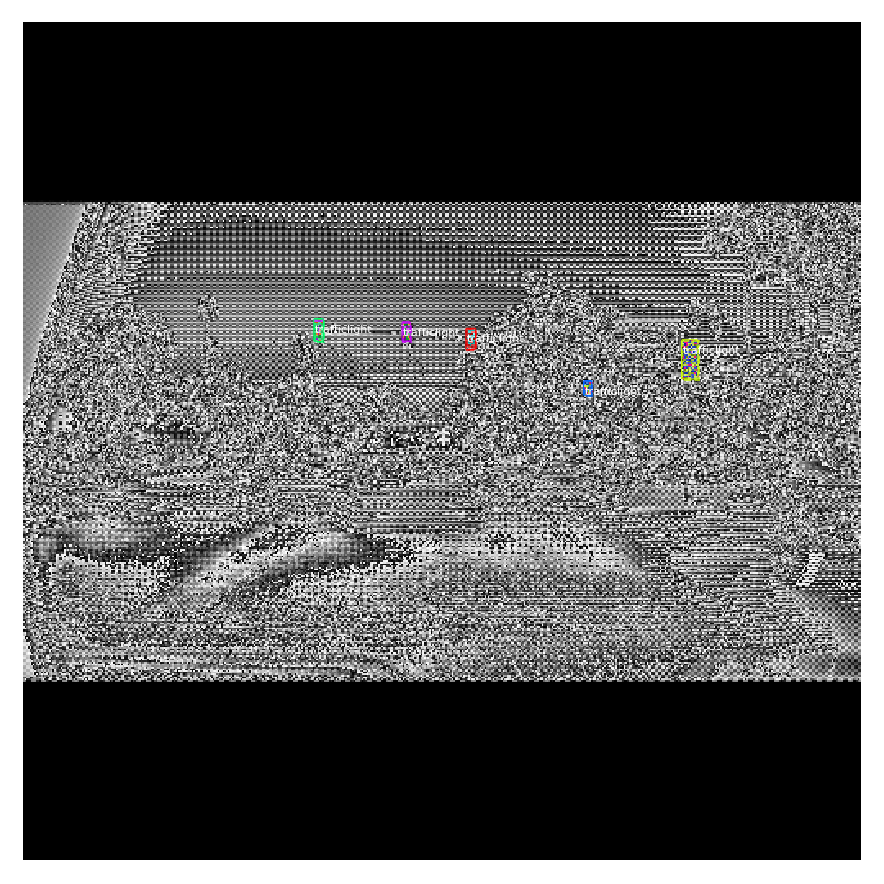

In [0]:
# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

MINI MASK

{'id': '514516.png', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/514516.png', 'width': 1280, 'height': 720, 'rect': [{'y_min': 245.1277071999, 'x_max': 1012.4345132584, 'occluded': False, 'x_min': 998.5270464696, 'y_max': 282.0127278138, 'label': 'Green'}, {'y_min': 282.0127278138, 'x_max': 913.8729007985, 'occluded': False, 'x_min': 901.1747789478, 'y_max': 304.9902816388, 'label': 'Green'}, {'y_min': 281.5663269315, 'x_max': 274.1309877882, 'occluded': False, 'x_min': 266.047980474, 'y_max': 304.4681809883, 'label': 'Yellow'}]}
<class 'numpy.ndarray'>
START: (245.1277071999, 998.5270464696)
END: (282.0127278138, 1012.4345132584)
START: (282.0127278138, 901.1747789478)
END: (304.9902816388, 913.8729007985)
START: (281.5663269315, 266.047980474)
END: (304.4681809883, 274.1309877882)
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min

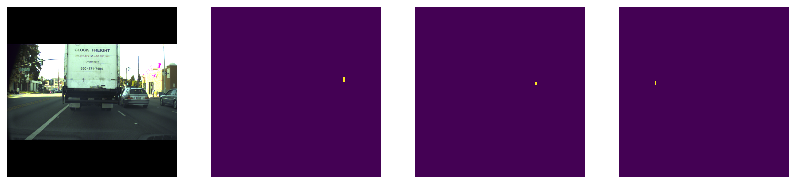

In [0]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

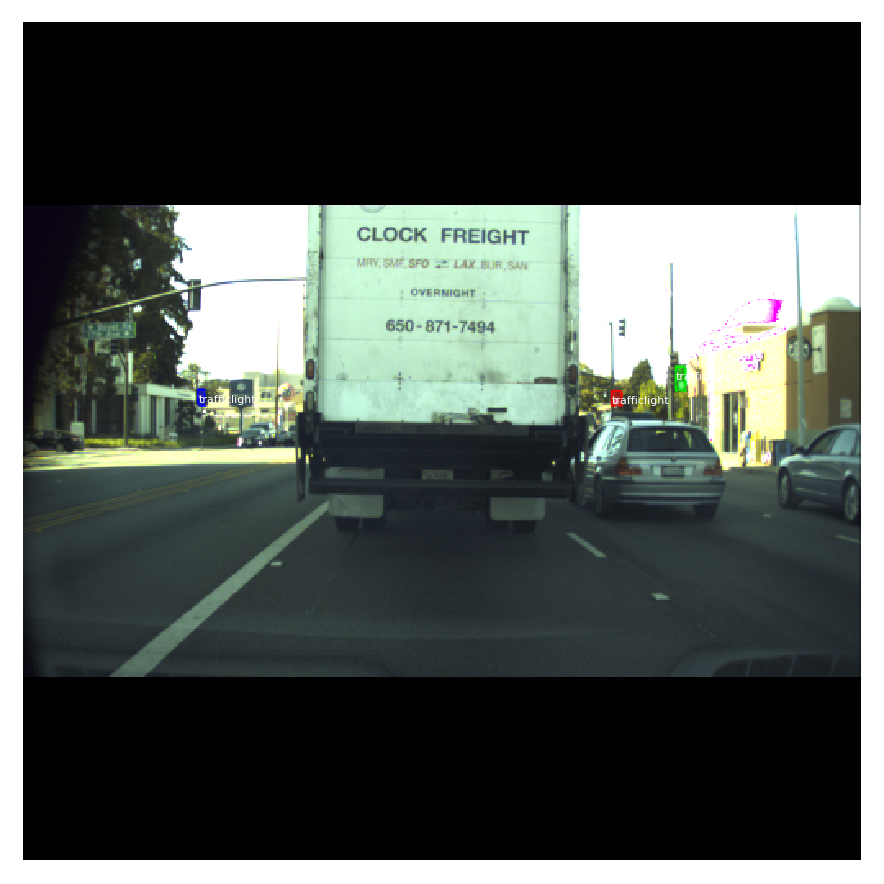

In [0]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

{'id': '514516.png', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/514516.png', 'width': 1280, 'height': 720, 'rect': [{'y_min': 245.1277071999, 'x_max': 1012.4345132584, 'occluded': False, 'x_min': 998.5270464696, 'y_max': 282.0127278138, 'label': 'Green'}, {'y_min': 282.0127278138, 'x_max': 913.8729007985, 'occluded': False, 'x_min': 901.1747789478, 'y_max': 304.9902816388, 'label': 'Green'}, {'y_min': 281.5663269315, 'x_max': 274.1309877882, 'occluded': False, 'x_min': 266.047980474, 'y_max': 304.4681809883, 'label': 'Yellow'}]}
<class 'numpy.ndarray'>
START: (245.1277071999, 998.5270464696)
END: (282.0127278138, 1012.4345132584)
START: (282.0127278138, 901.1747789478)
END: (304.9902816388, 913.8729007985)
START: (281.5663269315, 266.047980474)
END: (304.4681809883, 274.1309877882)
mask                     shape: (56, 56, 3)           min:    1.00000  max:    1.00000  bool


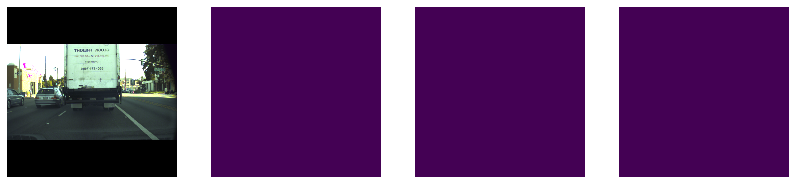

In [0]:
# Add augmentation and mask resizing.
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augment=True, use_mini_mask=True)
log("mask", mask)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

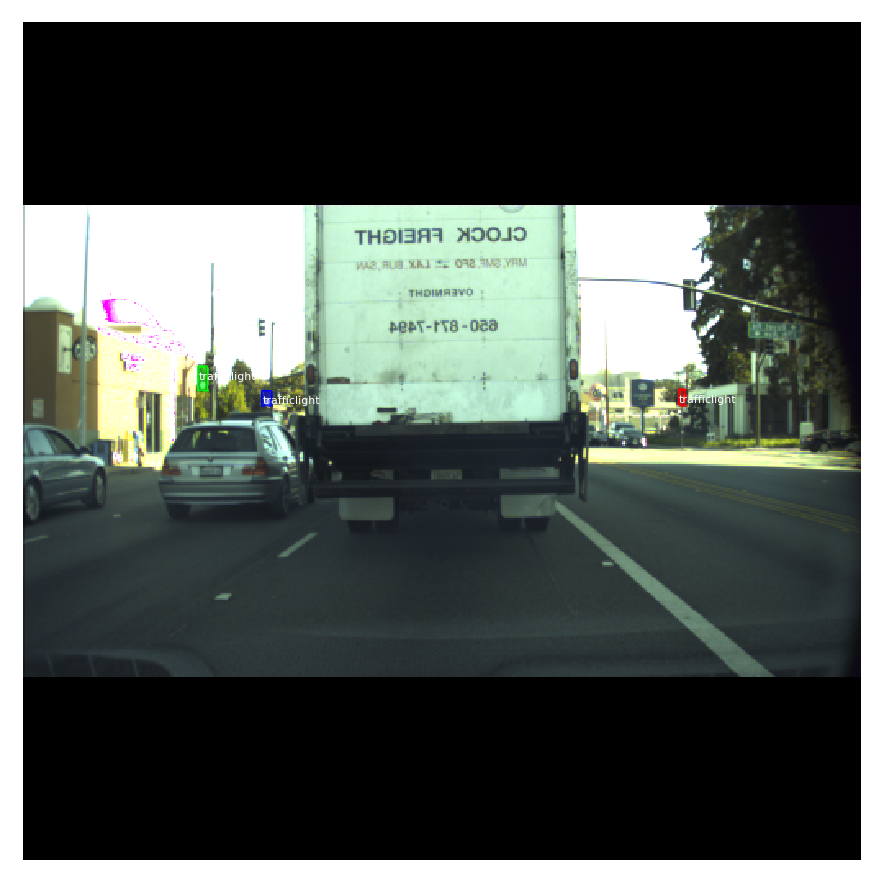

In [0]:
mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)


ANCHOR

In [0]:
# Generate Anchors
backbone_shapes = modellib.compute_backbone_shapes(config, config.IMAGE_SHAPE)
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                          config.RPN_ANCHOR_RATIOS,
                                          backbone_shapes,
                                          config.BACKBONE_STRIDES, 
                                          config.RPN_ANCHOR_STRIDE)

# Print summary of anchors
num_levels = len(backbone_shapes)
anchors_per_cell = len(config.RPN_ANCHOR_RATIOS)
print("Count: ", anchors.shape[0])
print("Scales: ", config.RPN_ANCHOR_SCALES)
print("ratios: ", config.RPN_ANCHOR_RATIOS)
print("Anchors per Cell: ", anchors_per_cell)
print("Levels: ", num_levels)
anchors_per_level = []
for l in range(num_levels):
    num_cells = backbone_shapes[l][0] * backbone_shapes[l][1]
    anchors_per_level.append(anchors_per_cell * num_cells // config.RPN_ANCHOR_STRIDE**2)
    print("Anchors in Level {}: {}".format(l, anchors_per_level[l]))

Count:  65472
Scales:  (8, 16, 32, 64, 128)
ratios:  [0.5, 1, 2]
Anchors per Cell:  3
Levels:  5
Anchors in Level 0: 49152
Anchors in Level 1: 12288
Anchors in Level 2: 3072
Anchors in Level 3: 768
Anchors in Level 4: 192


{'id': '689908.pgm', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/689908.pgm', 'width': 1280, 'height': 736, 'rect': [{'label': 'Green', 'occluded': False, 'x_max': 614.5327686767, 'x_min': 605.1857701408, 'y_max': 259.453104504, 'y_min': 240.5365598481}, {'label': 'Green', 'occluded': False, 'x_max': 623.9077608865, 'x_min': 620.28111458, 'y_max': 299.2659285288, 'y_min': 290.5619773931}, {'label': 'Green', 'occluded': False, 'x_max': 718.0295658375, 'x_min': 711.1305907277, 'y_max': 284.5499936087, 'y_min': 273.2000668152}, {'label': 'Green', 'occluded': False, 'x_max': 754.3048220601, 'x_min': 742.5098000981, 'y_max': 284.5499936087, 'y_min': 260.0697593481}]}
<class 'numpy.ndarray'>
START: (240.5365598481, 605.1857701408)
END: (259.453104504, 614.5327686767)
START: (290.5619773931, 620.28111458)
END: (299.2659285288, 623.9077608865)
START: (273.2000668152, 711.1305907277)
END: (284.5499936087, 718.0295658375)
START: (260.0697593

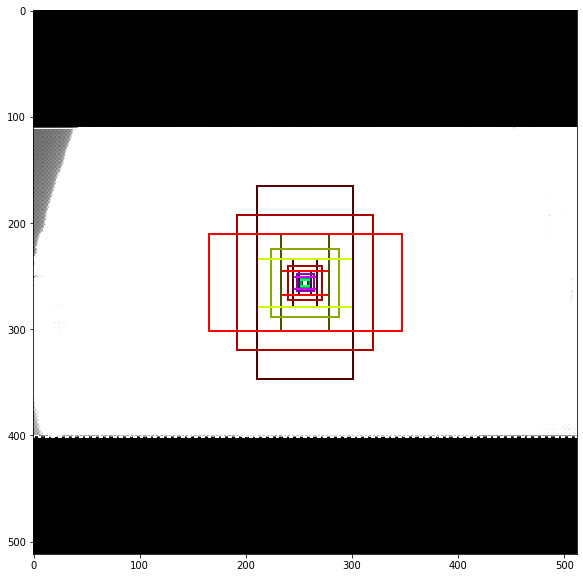

In [0]:
## Visualize anchors of one cell at the center of the feature map of a specific level

# Load and draw random image
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, _, _, _ = modellib.load_image_gt(dataset, config, image_id)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)
levels = len(backbone_shapes)

for level in range(levels):
    colors = visualize.random_colors(levels)
    # Compute the index of the anchors at the center of the image
    level_start = sum(anchors_per_level[:level]) # sum of anchors of previous levels
    level_anchors = anchors[level_start:level_start+anchors_per_level[level]]
    print("Level {}. Anchors: {:6}  Feature map Shape: {}".format(level, level_anchors.shape[0], 
                                                                  backbone_shapes[level]))
    center_cell = backbone_shapes[level] // 2
    center_cell_index = (center_cell[0] * backbone_shapes[level][1] + center_cell[1])
    level_center = center_cell_index * anchors_per_cell 
    center_anchor = anchors_per_cell * (
        (center_cell[0] * backbone_shapes[level][1] / config.RPN_ANCHOR_STRIDE**2) \
        + center_cell[1] / config.RPN_ANCHOR_STRIDE)
    level_center = int(center_anchor)

    # Draw anchors. Brightness show the order in the array, dark to bright.
    for i, rect in enumerate(level_anchors[level_center:level_center+anchors_per_cell]):
        y1, x1, y2, x2 = rect
        p = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, facecolor='none',
                              edgecolor=(i+1)*np.array(colors[level]) / anchors_per_cell)
        ax.add_patch(p)

DATA GENERATOR

In [0]:

# Create data generator
random_rois = 2000
g = modellib.data_generator(
    dataset, config, shuffle=True, random_rois=random_rois, 
    batch_size=4,
    detection_targets=True)

In [0]:
# Get Next Image
if random_rois:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_class_ids, gt_boxes, gt_masks, rpn_rois, rois], \
    [mrcnn_class_ids, mrcnn_bbox, mrcnn_mask] = next(g)
    
    log("rois", rois)
    log("mrcnn_class_ids", mrcnn_class_ids)
    log("mrcnn_bbox", mrcnn_bbox)
    log("mrcnn_mask", mrcnn_mask)
else:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_boxes, gt_masks], _ = next(g)
    
log("gt_class_ids", gt_class_ids)
log("gt_boxes", gt_boxes)
log("gt_masks", gt_masks)
log("rpn_match", rpn_match, )
log("rpn_bbox", rpn_bbox)
image_id = modellib.parse_image_meta(image_meta)["image_id"][0]
print("image_id: ", image_id, dataset.image_reference(image_id))

# Remove the last dim in mrcnn_class_ids. It's only added
# to satisfy Keras restriction on target shape.
mrcnn_class_ids = mrcnn_class_ids[:,:,0]

{'id': '601426.pgm', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/601426.pgm', 'width': 1280, 'height': 736, 'rect': []}
<class 'numpy.ndarray'>
{'id': '626322.png', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/626322.png', 'width': 1280, 'height': 720, 'rect': []}
<class 'numpy.ndarray'>
{'id': '627988.png', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/627988.png', 'width': 1280, 'height': 720, 'rect': []}
<class 'numpy.ndarray'>
{'id': '625044.png', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/625044.png', 'width': 1280, 'height': 720, 'rect': []}
<class 'numpy.ndarray'>
{'id': '713670.pgm', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/713670.pgm', 'width': 1280, 'height': 736, 'rect': []}
<class 'numpy.ndarray'>
{'id'

anchors                  shape: (65472, 4)            min:  -90.50967  max:  538.50967  float64
refined_anchors          shape: (2, 4)                min:  229.00000  max:  280.00000  float32
Positive anchors: 2
Negative anchors: 318
Neutral anchors: 65152
BG                     : 473
trafficlight           : 39


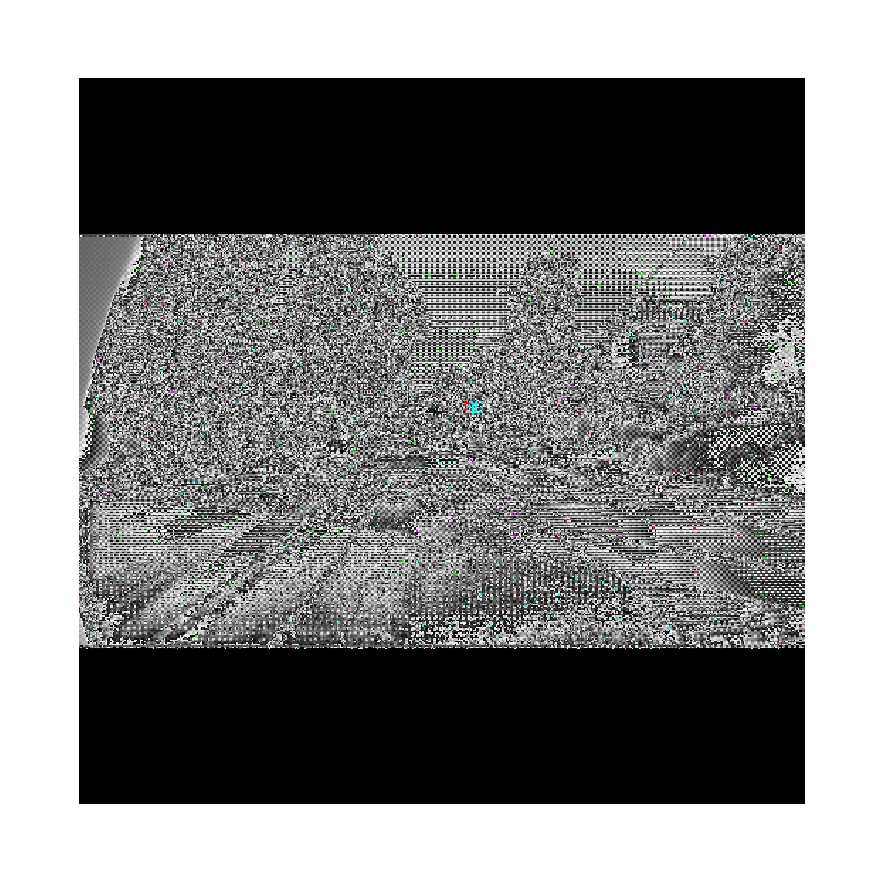

In [0]:
b= 0
# Restore original image (reverse normalization)
sample_image = modellib.unmold_image(normalized_images[b], config)

# Compute anchor shifts.
indices = np.where(rpn_match[b] == 1)[0]
refined_anchors = utils.apply_box_deltas(anchors[indices], rpn_bbox[b, :len(indices)] * config.RPN_BBOX_STD_DEV)
log("anchors", anchors)
log("refined_anchors", refined_anchors)

# Get list of positive anchors
positive_anchor_ids = np.where(rpn_match[b] == 1)[0]
print("Positive anchors: {}".format(len(positive_anchor_ids)))
negative_anchor_ids = np.where(rpn_match[b] == -1)[0]
print("Negative anchors: {}".format(len(negative_anchor_ids)))
neutral_anchor_ids = np.where(rpn_match[b] == 0)[0]
print("Neutral anchors: {}".format(len(neutral_anchor_ids)))

# ROI breakdown by class
for c, n in zip(dataset.class_names, np.bincount(mrcnn_class_ids[b].flatten())):
    if n:
        print("{:23}: {}".format(c[:20], n))

# Show positive anchors
fig, ax = plt.subplots(1, figsize=(16, 16))
visualize.draw_boxes(sample_image, boxes=anchors[positive_anchor_ids], 
                     refined_boxes=refined_anchors, ax=ax)

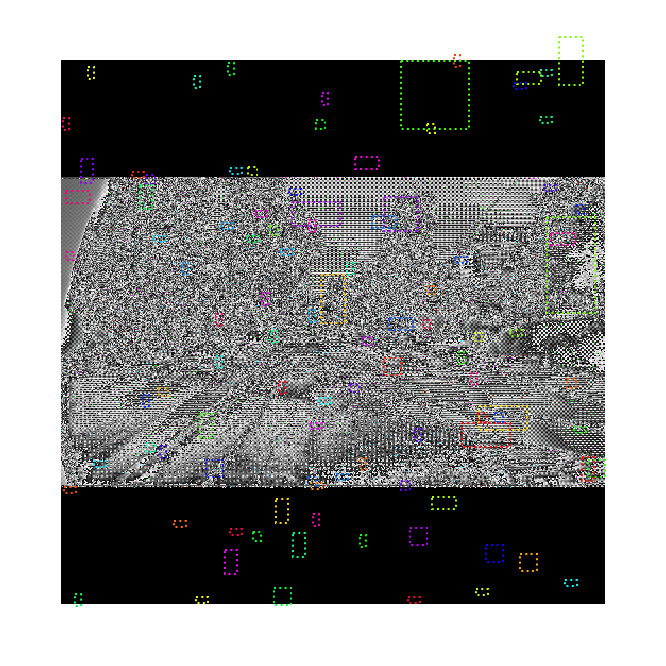

In [0]:
# Show neutral anchors. They don't contribute to training.
visualize.draw_boxes(sample_image, boxes=anchors[np.random.choice(neutral_anchor_ids, 100)])

Positive ROIs:  39
Negative ROIs:  473
Positive Ratio: 0.08
Unique ROIs: 469 out of 512


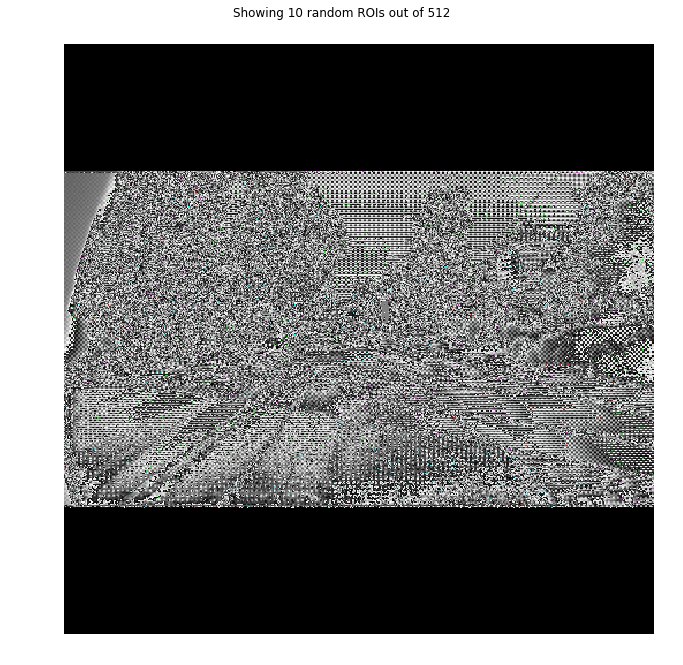

In [0]:

if random_rois:
    # Class aware bboxes
    bbox_specific = mrcnn_bbox[b, np.arange(mrcnn_bbox.shape[1]), mrcnn_class_ids[b], :]

    # Refined ROIs
    refined_rois = utils.apply_box_deltas(rois[b].astype(np.float32), bbox_specific[:,:4] * config.BBOX_STD_DEV)

    # Class aware masks
    mask_specific = mrcnn_mask[b, np.arange(mrcnn_mask.shape[1]), :, :, mrcnn_class_ids[b]]

    visualize.draw_rois(sample_image, rois[b], refined_rois, mask_specific, mrcnn_class_ids[b], dataset.class_names)
    
    # Any repeated ROIs?
    rows = np.ascontiguousarray(rois[b]).view(np.dtype((np.void, rois.dtype.itemsize * rois.shape[-1])))
    _, idx = np.unique(rows, return_index=True)
    print("Unique ROIs: {} out of {}".format(len(idx), rois.shape[1]))

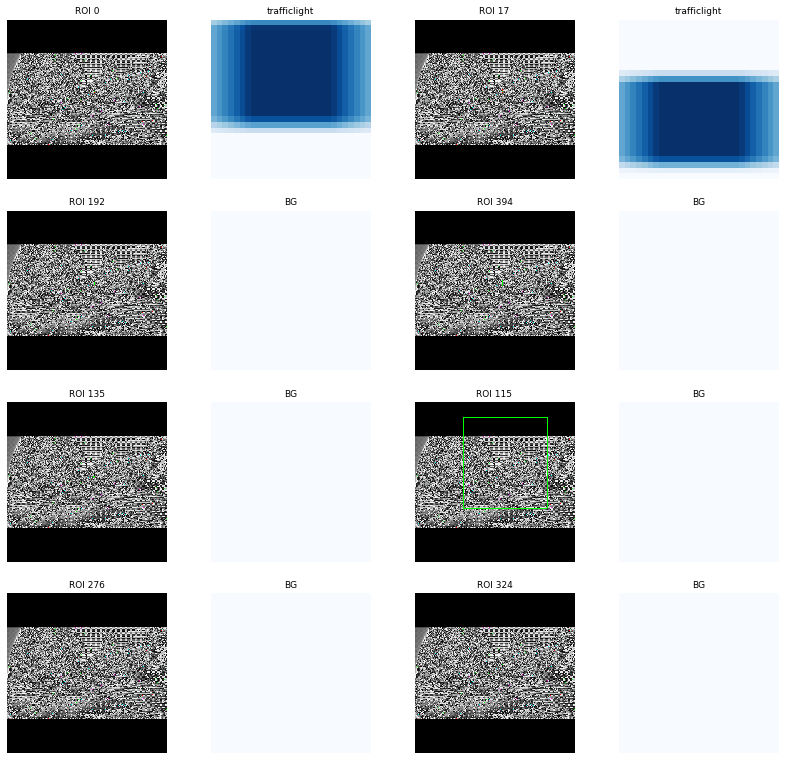

In [0]:
if random_rois:
    # Dispalay ROIs and corresponding masks and bounding boxes
    ids = random.sample(range(rois.shape[1]), 8)

    images = []
    titles = []
    for i in ids:
        image = visualize.draw_box(sample_image.copy(), rois[b,i,:4].astype(np.int32), [255, 0, 0])
        image = visualize.draw_box(image, refined_rois[i].astype(np.int64), [0, 255, 0])
        images.append(image)
        titles.append("ROI {}".format(i))
        images.append(mask_specific[i] * 255)
        titles.append(dataset.class_names[mrcnn_class_ids[b,i]][:20])

    display_images(images, titles, cols=4, cmap="Blues", interpolation="none")

In [0]:
# Check ratio of positive ROIs in a set of images.
if random_rois:
    limit = 10
    temp_g = modellib.data_generator(
        dataset, config, shuffle=True, random_rois=10000, 
        batch_size=1, detection_targets=True)
    total = 0
    for i in range(limit):
        _, [ids, _, _] = next(temp_g)
        positive_rois = np.sum(ids[0] > 0)
        total += positive_rois
        print("{:5} {:5.2f}".format(positive_rois, positive_rois/ids.shape[1]))
    print("Average percent: {:.2f}".format(total/(limit*ids.shape[1])))

{'id': '630058.pgm', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/630058.pgm', 'width': 1280, 'height': 736, 'rect': []}
<class 'numpy.ndarray'>
{'id': '558456.pgm', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/558456.pgm', 'width': 1280, 'height': 736, 'rect': []}
<class 'numpy.ndarray'>
{'id': '614982.png', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/614982.png', 'width': 1280, 'height': 720, 'rect': []}
<class 'numpy.ndarray'>
{'id': '685350.png', 'source': 'trafficlight', 'path': '/content/drive/My Drive/Colab Notebooks/HCLHackathon/data/train/685350.png', 'width': 1280, 'height': 720, 'rect': [{'y_min': 282.7634131227, 'x_max': 572.3855259288, 'occluded': False, 'x_min': 566.6817991518, 'y_max': 294.483802454, 'label': 'Yellow'}, {'y_min': 280.3151918783, 'x_max': 620.7227565678, 'occluded': False, 'x_min': 615.368012999